# Correlations

In [3]:
#import libriaries
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import datetime
import plotly.express as px
import sqlite3
import os
import sqlite3

#Destination folder
os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Create your connection.
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

# SP500 index price correlations

In [61]:
indicator="SP500"
#Get SQLLite select statement for SP500 index and indicators
df = pd.read_sql_query("""select x."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,SP500
2492,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,2475.56
2493,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,2630.07
2494,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,2541.47
2495,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,2626.65
2496,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,2584.59


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,SP500
Gold,1.000000,0.165391,0.461894,0.540390,0.795981,0.462923,-0.093131,-0.169101,0.186781,-0.260548
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.719717
Crude_Oil,0.461894,-0.821807,1.000000,0.808247,0.683261,0.815463,0.577026,-0.413958,-0.271204,-0.609251
Copper,0.540390,-0.793628,0.808247,1.000000,0.805532,0.828080,0.504719,-0.532574,-0.189316,-0.607067
Silver,0.795981,-0.726239,0.683261,0.805532,1.000000,0.801340,0.258863,-0.561221,-0.256601,-0.656352
Platinum,0.462923,-0.722762,0.815463,0.828080,0.801340,1.000000,0.584072,-0.785397,-0.479912,-0.884241
Natural_Gas,-0.093131,-0.689060,0.577026,0.504719,0.258863,0.584072,1.000000,-0.429352,-0.341965,-0.500309
Industrial_Production,-0.169101,-0.656775,-0.413958,-0.532574,-0.561221,-0.785397,-0.429352,1.000000,0.669226,0.908460
Palladium,0.186781,-0.179127,-0.271204,-0.189316,-0.256601,-0.479912,-0.341965,0.669226,1.000000,0.752508
SP500,-0.260548,-0.719717,-0.609251,-0.607067,-0.656352,-0.884241,-0.500309,0.908460,0.752508,1.000000


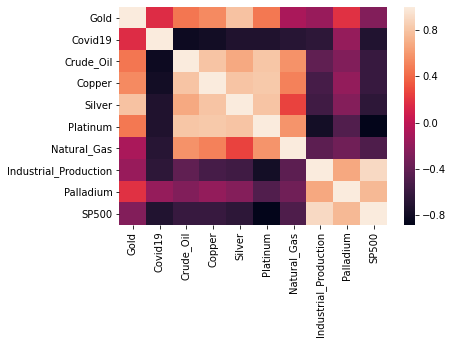

In [62]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df1=df.corr()
df1

# Boening stock prices correlations

In [65]:
indicator="Boening"
#Get SQLLite select statement Boening stock prices and indicators
df = pd.read_sql_query("""select x."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Boening
2492,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,158.73
2493,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,180.55
2494,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,162.00
2495,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,152.28
2496,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,149.14


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Boening
Gold,1.000000,0.165391,0.461894,0.540390,0.795981,0.462923,-0.093131,-0.169101,0.186781,-0.195411
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.732136
Crude_Oil,0.461894,-0.821807,1.000000,0.808247,0.683261,0.815463,0.577026,-0.413958,-0.271204,-0.468556
Copper,0.540390,-0.793628,0.808247,1.000000,0.805532,0.828080,0.504719,-0.532574,-0.189316,-0.413955
Silver,0.795981,-0.726239,0.683261,0.805532,1.000000,0.801340,0.258863,-0.561221,-0.256601,-0.565800
Platinum,0.462923,-0.722762,0.815463,0.828080,0.801340,1.000000,0.584072,-0.785397,-0.479912,-0.784315
Natural_Gas,-0.093131,-0.689060,0.577026,0.504719,0.258863,0.584072,1.000000,-0.429352,-0.341965,-0.385716
Industrial_Production,-0.169101,-0.656775,-0.413958,-0.532574,-0.561221,-0.785397,-0.429352,1.000000,0.669226,0.846046
Palladium,0.186781,-0.179127,-0.271204,-0.189316,-0.256601,-0.479912,-0.341965,0.669226,1.000000,0.748445
Boening,-0.195411,-0.732136,-0.468556,-0.413955,-0.565800,-0.784315,-0.385716,0.846046,0.748445,1.000000


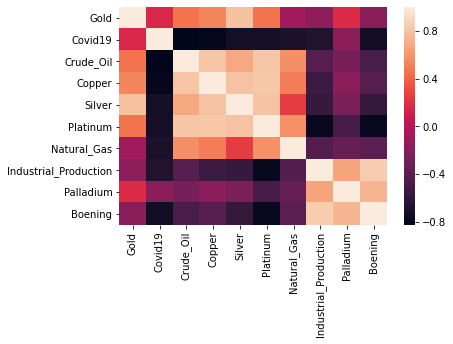

In [66]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df1=df.corr()
df1

# Exxon mobil stock prices correlations

In [67]:
indicator="Exxon_mobil"
#Get SQLLite select statement Exxon_mobil stock prices and indicators
df = pd.read_sql_query("""select x."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Exxon_mobil
2492,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,37.29
2493,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,38.82
2494,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,36.95
2495,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,37.50
2496,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,37.97


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Exxon_mobil
Gold,1.000000,0.165391,0.461894,0.540390,0.795981,0.462923,-0.093131,-0.169101,0.186781,-0.017257
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.739311
Crude_Oil,0.461894,-0.821807,1.000000,0.808247,0.683261,0.815463,0.577026,-0.413958,-0.271204,0.357024
Copper,0.540390,-0.793628,0.808247,1.000000,0.805532,0.828080,0.504719,-0.532574,-0.189316,0.061961
Silver,0.795981,-0.726239,0.683261,0.805532,1.000000,0.801340,0.258863,-0.561221,-0.256601,0.137210
Platinum,0.462923,-0.722762,0.815463,0.828080,0.801340,1.000000,0.584072,-0.785397,-0.479912,0.138500
Natural_Gas,-0.093131,-0.689060,0.577026,0.504719,0.258863,0.584072,1.000000,-0.429352,-0.341965,0.148803
Industrial_Production,-0.169101,-0.656775,-0.413958,-0.532574,-0.561221,-0.785397,-0.429352,1.000000,0.669226,0.173144
Palladium,0.186781,-0.179127,-0.271204,-0.189316,-0.256601,-0.479912,-0.341965,0.669226,1.000000,-0.318048
Exxon_mobil,-0.017257,-0.739311,0.357024,0.061961,0.137210,0.138500,0.148803,0.173144,-0.318048,1.000000


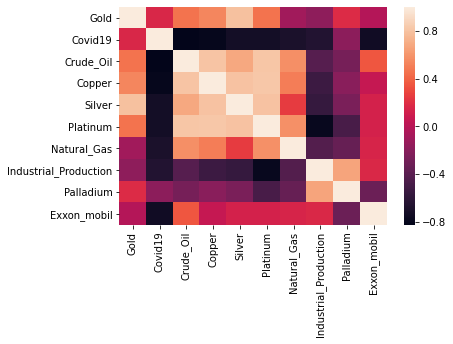

In [68]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df.corr()

# Alaska air group stock prices correlations

In [70]:
indicator="Alaska_Air_Group"
#Get SQLLite select statement Alaska air group stock prices and indicators
df = pd.read_sql_query("""select x."Date", g."Index" as Gold, c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum, ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Alaska_Air_Group
2492,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,29.84
2493,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,32.49
2494,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,29.87
2495,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,28.33
2496,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,28.47


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Alaska_Air_Group
Gold,1.000000,0.165391,0.461894,0.540390,0.795981,0.462923,-0.093131,-0.169101,0.186781,-0.512779
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.785779
Crude_Oil,0.461894,-0.821807,1.000000,0.808247,0.683261,0.815463,0.577026,-0.413958,-0.271204,-0.779286
Copper,0.540390,-0.793628,0.808247,1.000000,0.805532,0.828080,0.504719,-0.532574,-0.189316,-0.787239
Silver,0.795981,-0.726239,0.683261,0.805532,1.000000,0.801340,0.258863,-0.561221,-0.256601,-0.711117
Platinum,0.462923,-0.722762,0.815463,0.828080,0.801340,1.000000,0.584072,-0.785397,-0.479912,-0.879158
Natural_Gas,-0.093131,-0.689060,0.577026,0.504719,0.258863,0.584072,1.000000,-0.429352,-0.341965,-0.504300
Industrial_Production,-0.169101,-0.656775,-0.413958,-0.532574,-0.561221,-0.785397,-0.429352,1.000000,0.669226,0.712106
Palladium,0.186781,-0.179127,-0.271204,-0.189316,-0.256601,-0.479912,-0.341965,0.669226,1.000000,0.321388
Alaska_Air_Group,-0.512779,-0.785779,-0.779286,-0.787239,-0.711117,-0.879158,-0.504300,0.712106,0.321388,1.000000


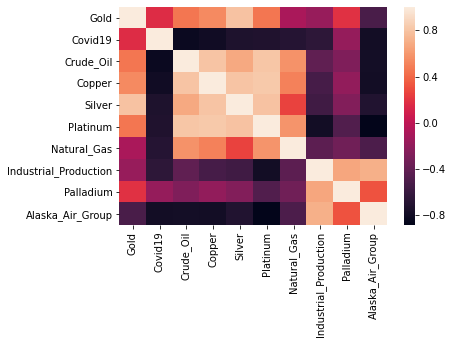

In [72]:
#Make correlation table with heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#Make correlation basic table
df.corr()